# Исследование маркетинговой кампании приложения Procrastinate Pro+

<div style="border:solid black 2px; padding: 20px">    
    <b style='font-size:2rem'>Цель исследования:</b><br/>
    Выявить причины неудач рекламных кампаний приложения, разработка рекомендаций по увеличению прибыли для отдела маркетинга<br/><br/>
    <b style='font-size:2rem'>Этапы исследования:</b><br/>
    <ul>
        <li>Подготовка данных</li>
        <li>Анализ пользовательских профилей</li>
        <li>Исследование затрат на рекламу</li>
        <li>Оценка окупаемости рекламы</li>
    </ul>
</div>

### Загрузите данные и подготовьте их к анализу

#### Загрузка данных и первичное ознакомление

<i>Загрузим библиотеки, которые могут понадобиться нам в работе</i>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

<i>Загрузим данные о посещениях</i>

In [2]:
visits = pd.read_csv('data/visits_info_short.csv')

<i>Посмотрим на датасет в целом</i>

In [3]:
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


<i>И на общую информацию о нём</i>

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


<i>Загрузим данные о заказах</i>

In [5]:
orders = pd.read_csv('data/orders_info_short.csv')

<i>Посмотрим на датасет в целом</i>

In [6]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


<i>И на общую информацию о нём</i>

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


<i>Загрузим данные о расходах на рекламу</i>

In [8]:
costs = pd.read_csv('data/costs_info_short.csv')

<i>Посмотрим на датасет в целом</i>

In [9]:
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


<i>И на общую информацию о нём</i>

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Переименование столбцов, работа с дубликатами

<i>Приведём названия столбцов во всех датасетах к единому виду - нижний регистр, нижнее подчёркивание вместо пробелов</i>

In [11]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [12]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [13]:
costs.columns = ['dt', 'channel', 'costs']

<i>Проверим все данные на наличие явных дубликатов</i>

In [14]:
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

<i>Очень хорошо, явных дубликатов нет. Теперь перейдём к обработке пропусков в данных</i>

#### Обработка пропусков

<i>Ранее вывод info по каждому датафрейму показал нам отсутствие пропусков в данных, но проверим это ещё раз и визуализируем</i>

In [17]:
pd.DataFrame(round(visits.isna().mean()*100)).style.background_gradient('coolwarm')

,0
user_id,0.000000
region,0.000000
device,0.000000
channel,0.000000
session_start,0.000000
session_end,0.000000


In [18]:
pd.DataFrame(round(orders.isna().mean()*100)).style.background_gradient('coolwarm')

,0
user_id,0.000000
event_dt,0.000000
revenue,0.000000


In [19]:
pd.DataFrame(round(costs.isna().mean()*100)).style.background_gradient('coolwarm')

,0
dt,0.000000
channel,0.000000
costs,0.000000


<i>Отлично - как и ожидалось, пропуски в данных отсутствуют. Переходим к преобразованию типов</i>

#### Преобразование типов данных

<i>Во всех датафреймах в преобразовании типов нуждаются только те столбцы, в которых содержится дата и время. Приведём их к типу datetime</i>

In [20]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<i>Проверим, что преобразования привели к нужному результату</i>

In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<i>В последнем датафрейме тип первого столбца - object, но нам это и нужно для дальнейшей работы</i>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Нам попались очень хорошие данные - практически не нуждающиеся в предобработке. Спасибо инженерам, подготовившим их для нас! Следующий шаг - загрузка необходимых для расчёта и визуализации метрик функций</b></i>
</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для создания таблиц с данными о пользователях и маркетинговыми метриками

<i>Импортируем функцию создания пользовательских профилей</i>

In [24]:
def get_profiles(visits, orders, ad_costs):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<i>Для подсчёта RR</i>

In [25]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<i>Для подсчёта конверсии</i>

In [26]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<i>И для расчёта LTV и ROI</i>

In [27]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для фильтрации и визуализации

<i>А также загрузим функции для фильтрации данных (со скользящим средним) и визуализации метрик</i>

In [28]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [29]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

In [30]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Все необходимые функции подгружены, данные подготовлены. Приступаем к анализу</b></i>
</div>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Пользовательские профили

<i>Построим таблицу с профилями пользователей, используя наши данные и ранее определённую функцию. Выведем несколько первых строк этой таблицы</i>

In [32]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


<i>Найдём минимальную и максимальную даты привлечения пользователей</i>

In [33]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print('Минимальная дата привлечения:', min_analysis_date)
print('Максимальная дата привлечения:', max_analysis_date)

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


<div style="border:solid black 1px; padding: 10px"><i>Таблица профилей имеет нужный нам для работы вид. Есть все данные - каналы привлечения, устройства, страны. Похоже, всё сработало, как надо - например, мы видим, что стоимость привлечения пользователей из канала organic равна 0 - так и должно быть. Также видим, что в наших руках данные примерно за полгода</i></div>

#### Анализ пользователей по странам

<i>Сгруппируем пользователей по странам - для каждой страны выведем количество уникальных пользователей оттуда, а также процент платящих пользователей. Отсортируем сначала по количеству пользователей</i>

In [34]:
profiles_region = profiles.groupby('region').agg({'user_id' : 'nunique', 'payer' : 'mean'})
profiles_region.columns = ['total_users', 'payers_percent']
profiles_region['payers_percent'] = profiles_region['payers_percent'] * 100
profiles_region = profiles_region.sort_values(by='total_users', ascending=False)
profiles_region

,total_users,payers_percent
region,,
United States,100002,6.901862
UK,17575,3.982930
France,17450,3.799427
Germany,14981,4.111875


<i>Теперь отсортируем данные по доле платящих пользователей</i>

In [35]:
profiles_region = profiles_region.sort_values(by='payers_percent', ascending=False)
profiles_region

,total_users,payers_percent
region,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


<div style="border:solid black 1px; padding: 10px"><i>Подавляющее большинство пользователей - из США. Пользователи из этой страны являются также и самыми "покупающими". По Великобритании и Франции практически идентичные показатели (только среди французов чуть меньше платящих). Пользователей из Германии меньше всего, но зато они охотнее делают покупки - чаще, чем пользователи из других европейских стран</i></div>

#### Анализ пользователей по устройствам

<i>Построим аналогично таблицу по устройствам и также сначала отсортируем по количеству пользователей</i>

In [36]:
profiles_device = profiles.groupby('device').agg({'user_id' : 'nunique', 'payer' : 'mean'})
profiles_device.columns = ['total_users', 'payers_percent']
profiles_device['payers_percent'] = profiles_device['payers_percent'] * 100
profiles_device = profiles_device.sort_values(by='total_users', ascending=False)
profiles_device

,total_users,payers_percent
device,,
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790
Mac,30042,6.364423


<i>Теперь отсортируем данные по доле платящих пользователей</i>

In [37]:
profiles_device = profiles_device.sort_values(by='payers_percent', ascending=False)
profiles_device

,total_users,payers_percent
device,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


<div style="border:solid black 1px; padding: 10px"><i>Больше всего приложением пользуются на iPhone - на этой же платформе и почти самые "платящие" пользователи. Больше только на Mac - похоже, что пользователи экосистемы Apple охотнее совершают покупки в приложении. В рядах "отстающих" - пользователи PC - почти на полтора процента меньше платящих, чем на Mac</i></div>

#### Анализ пользователей по каналам

<i>Теперь строим таблицу по каналам привлечения</i>

In [38]:
profiles_channel = profiles.groupby('channel').agg({'user_id' : 'nunique', 'payer' : 'mean'})
profiles_channel.columns = ['total_users', 'payers_percent']
profiles_channel['payers_percent'] = profiles_channel['payers_percent'] * 100
profiles_channel = profiles_channel.sort_values(by='total_users', ascending=False)
profiles_channel

,total_users,payers_percent
channel,,
organic,56439,2.055316
FaceBoom,29144,12.204914
TipTop,19561,9.600736
OppleCreativeMedia,8605,2.707728
LeapBob,8553,3.063253
WahooNetBanner,8553,5.296387
RocketSuperAds,4448,7.913669
MediaTornado,4364,3.574702
YRabbit,4312,3.826531


<i>Теперь отсортируем данные по доле платящих пользователей</i>

In [39]:
profiles_channel = profiles_channel.sort_values(by='payers_percent', ascending=False)
profiles_channel

,total_users,payers_percent
channel,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


<div style="border:solid black 1px; padding: 10px"><i>Здесь интересная картина - с отрывом почти в два раза по количеству пользователей преобладает органический трафик. Это важно и интересно, потому что для привлечения пользователей из этого источника не расходуется бюджет. Однако есть и плохая новость - пользователи оттуда платят неохотнее всего. С другой стороны, с площадки FaceBoom приходит тоже много пользователей, и вот среди них доля платящих самая высокая. Однако надо будет посмотреть расходы на рекламу и окупаемость этой площадки. Следует обратить более пристальное внимание и на площадки AdNonSense и lambdaMediaAds - оттуда приходит совсем мало пользователей, но при этом они хорошо покупают</i></div>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Итак, основная масса пользователей - из США, пользователи устройств iPhone и Mac. Учитывая проблемы с окупаемостью, вероятно, это не самая удачная целевая аудитория - проверим это далее. Много пользователей приходит из органических источников, но они плохо конвертируются в платящих. Посмотрим также на остальные показатели каналов, которые хорошо себя зарекомендовали с точки зрения конверсии</b></i>
</div>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Подсчет общей суммы расходов

<i>Найдём общую сумму расходов на рекламу из датафрейма costs</i>

In [40]:
costs['costs'].sum()

105497.30000000002

<i>Само по себе одно число мало что говорит. Посмотрим ещё на общую сумму покупок в приложении. Однако рассматривать покупки будем не от всех пользователей, а только от тех, кто пришёл не из органических источников - иными словами, от тех, на привлечение которых были потрачены деньги. Для этого отфильтруем таблицу profiles</i>

In [41]:
profiles = profiles.query('channel != "organic"').reset_index()
orders_non_organic = orders.query('user_id.isin(@profiles["user_id"])', engine='python')
orders_non_organic['revenue'].sum()

169335.65

<i>Итак, общая выручка больше, чем расходы на рекламу. Понятно, что это не означает, будто бы приложение однозначно успешно - ведь помимо рекламы есть и другие статьи расходов и по итогу после вычетов всех расходов приолжение действительно может оказаться сильно убыточным. Посмотрим на динамику соотношения общей выручки к затратам на рекламу по неделям. Для этого создадим две сводные таблицы с общими суммами доходов и расходов по неделям</i>

In [42]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs_weekly = costs.pivot_table(index='week', values='costs', aggfunc='sum')
costs_weekly.head()

,costs
week,
18,1455.640
19,2031.820
20,1976.320
21,2297.120
22,3427.075


In [43]:
#игнорируем ворнинги вывода
pd.options.mode.chained_assignment = None

orders_non_organic['week'] = pd.to_datetime(orders_non_organic['event_dt']).dt.isocalendar().week
orders_weekly = orders_non_organic.pivot_table(index='week', values='revenue', aggfunc='sum')
orders_weekly.head()

,revenue
week,
18,924.34
19,2230.90
20,2407.47
21,2774.61
22,3623.24


<i>Теперь объединим эти таблицы в одну и добавим столбец с соотношением дохода от продаж в приложении и затрат на рекламу за каждую неделю</i>

In [44]:
profit = costs_weekly.join(orders_weekly)
profit['profit'] = profit['revenue'] / profit['costs']
profit.head()

,costs,revenue,profit
week,,,
18,1455.640,924.34,0.635006
19,2031.820,2230.90,1.097981
20,1976.320,2407.47,1.218158
21,2297.120,2774.61,1.207865
22,3427.075,3623.24,1.057240


<i>Вынесем последний показатель на график</i>

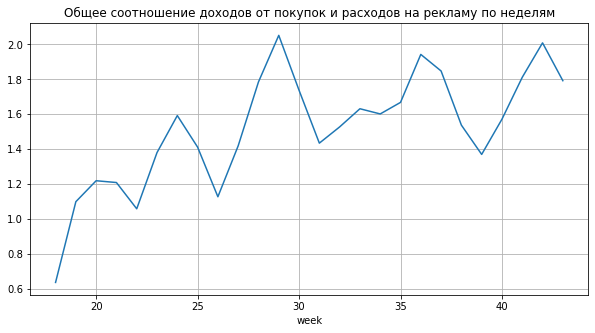

In [45]:
profit['profit'].plot(grid=True, figsize=(10, 5));
plt.title('Общее соотношение доходов от покупок и расходов на рекламу по неделям')
plt.show()

<i>Посмотрим ещё на накопительное соотношение доходов к расходам</i>

In [46]:
profit['costs_total'] = profit['costs'].cumsum()
profit['revenue_total'] = profit['revenue'].cumsum()
profit['profit_total'] = profit['revenue_total'] / profit['costs_total']
profit.head()

,costs,revenue,profit,costs_total,revenue_total,profit_total
week,,,,,,
18,1455.640,924.34,0.635006,1455.640,924.34,0.635006
19,2031.820,2230.90,1.097981,3487.460,3155.24,0.904739
20,1976.320,2407.47,1.218158,5463.780,5562.71,1.018107
21,2297.120,2774.61,1.207865,7760.900,8337.32,1.074272
22,3427.075,3623.24,1.057240,11187.975,11960.56,1.069055


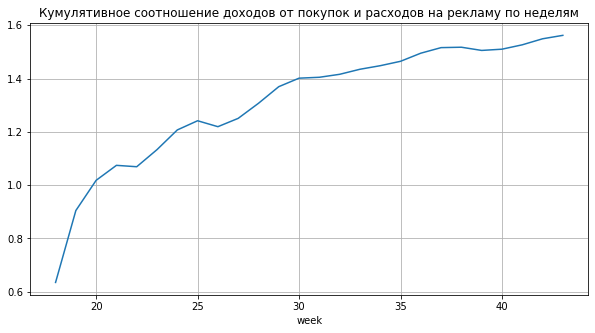

In [47]:
profit['profit_total'].plot(grid=True, figsize=(10, 5));
plt.title('Кумулятивное соотношение доходов от покупок и расходов на рекламу по неделям')
plt.show()

<div style="border:solid black 1px; padding: 10px"><i>Да, два последних графика не говорят об однозначной успешности приложения. Хоть доходы и превышают расходы на рекламу, однако, как уже было упомянуто ранее, реклама - не единственный источник расходов, да и кроме того, доходы превышают эти расходы не существенно. Более того, и на первом, и на втором графиках есть "проседания" - провалы относительно предыдущих недель. В идеальной ситуации доходы должны расти, а расходы - снижаться (как минимум, должно выполняться хотя бы одно из условий), и, например, от второго графика мы бы ждали подобие логарифмической кривой с постоянным возрастанием. Продолжим исследовать причины этого далее</i></div>

#### Распределение трат по источникам рекламы

<i>Сгруппируем расходы на рекламу по каналам и выведем их в порядке убывания суммы вложенных средств</i>

In [48]:
total_costs_by_channel = costs.groupby('channel').agg({'costs' : 'sum'}).sort_values('costs', ascending=False)
total_costs_by_channel

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div style="border:solid black 1px; padding: 10px"><i>На рекламу в источниках TipTop и FaceBoom потрачено в разы больше средств, чем на все остальные вместе взятые. Из предыдущего раздела мы помним, что FaceBoom - в целом привлекательный источник, пользователи оттуда хорошо конвертируются в платящих. Про TipTop такого же однозначно сказать нельзя</i></div>

#### Изменение расходов во времени

<i>Для отслеживания динамики расходов добавим в датафрейм costs два столбца с номером недели и номером месяца</i>

In [49]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


<i>Построим сводную таблицу недельных сумм расходов по каждому каналу привлечения. Отобразим это на общем графике, сравнив таким образом источники между собой</i>

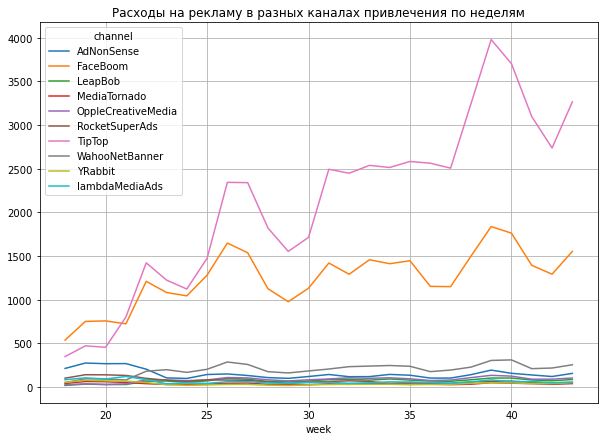

In [50]:
costs_weekly = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_weekly.plot(grid=True, figsize=(10, 7));
plt.title('Расходы на рекламу в разных каналах привлечения по неделям')
plt.show()

<i>Проделаем то же самое по месяцам</i>

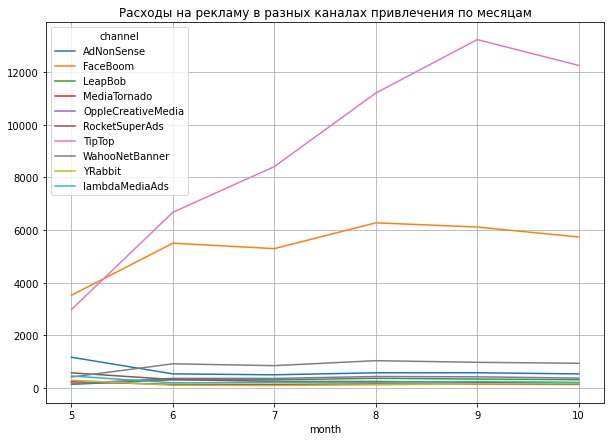

In [51]:
costs_monthly = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_monthly.plot(grid=True, figsize=(10, 7));
plt.title('Расходы на рекламу в разных каналах привлечения по месяцам')
plt.show()

<div style="border:solid black 1px; padding: 10px"><i>Визуализация приводит к тем же выводам - TipTop и FaceBoom заметно отрываются от всей основной группы. При этом на остальные источники расходы по времени распределяются довольно равномерно, у FaceBoom заметный скачок только от маю к июню, потом же тоже довольно равномерное распределение, а вот на TipTop же расходы растут регулярно. И если в масштабе недель наблюдается не только постоянный рост расходов, но и местами снижение относительно предыдущих недель, то в разрезе месяцев (более глобально) только в октябре сумма расходов перестала расти (и при этом все равно осталась на довольно высоком уровне). Возможно, эта площадка переоценена</i></div>

#### Стоимость привлечения пользователей из разных источников

<i>Посмотрим на среднюю стоимость привлечения одного пользователя по каждому каналу привлечения. В выводе не будет канала organic, который мы уже заранее исключили, но он здесь и не был бы нужен - стоимость привлечения там равна 0</i>

In [52]:
mean_costs_by_channel = profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).sort_values('acquisition_cost', ascending=False)
mean_costs_by_channel

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


<div style="border:solid black 1px; padding: 10px"><i>Да, и снова неприятный вывод относительно TipTop - в 2 с половиной раза относительно ближайшего преследователя здесь обходится привлечение одного пользователя. Это связано с очень большими расходами на рекламу именно там, которые не дают соответствующей прибыли. Примерно то же самое касается и двух следующих площадок - хоть там и выше процент конвертируемости пользователей в платящих, однако средняя стоимость привлечения сильно выше, чем у остальных (превышает 1)</i></div>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Постоянное растущее вливание средств на рекламу в канале TipTop не даёт желаемой отдачи. Стоимость привлечения одного пользователя из этого канала существенно выше, чем у остальных, а отклик по платежам - не самый высокий</b></i>
</div>

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы в целом

<i>Установим момент анализа и зададим двухнедельный горизонт данных</i>

In [53]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

<i>Посчитаем LTV и ROI и построим графики по этим данным (общие, без разбивок)</i>

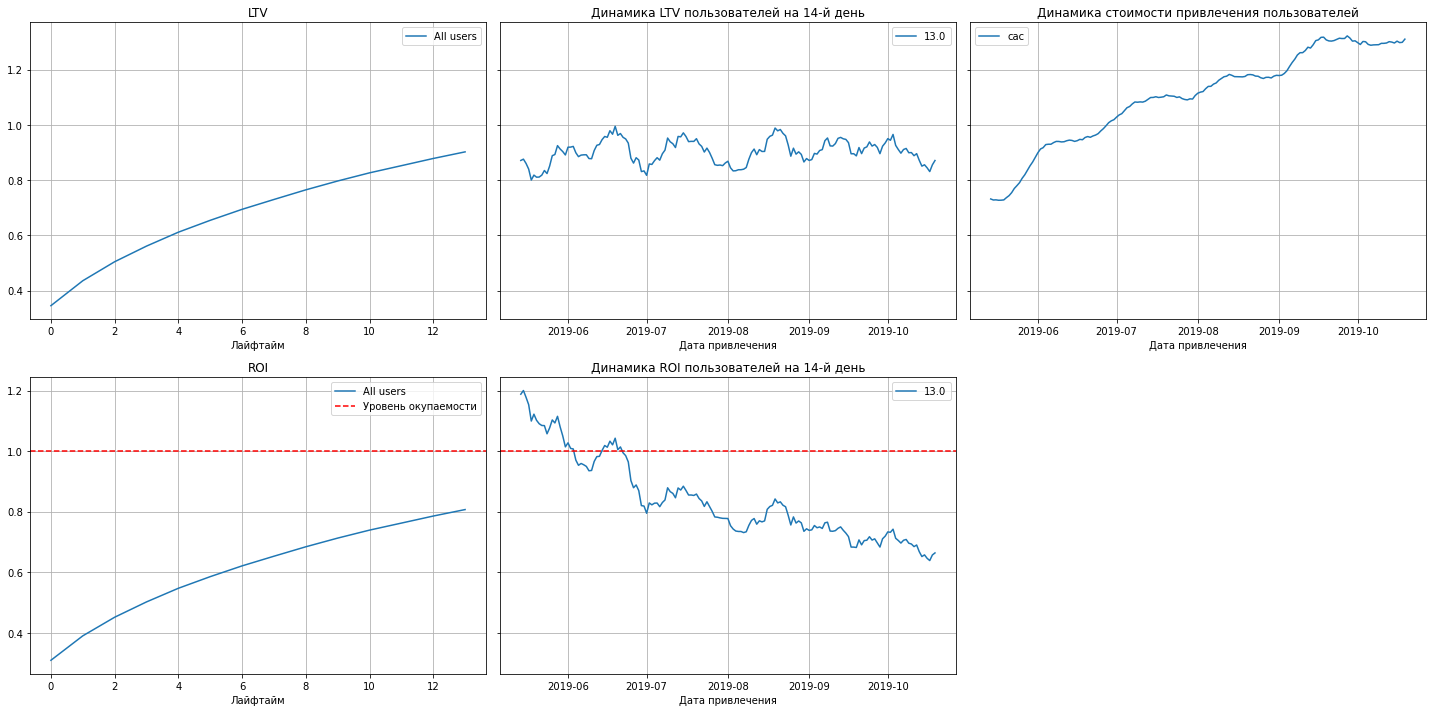

In [54]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div style="border:solid black 1px; padding: 10px"><i>
    <ul>
        <li>Общая картина неутешительная. Реклама не окупается, через две недели ROI составляет лишь немногим более 80%. Более того, в разрезе полугода он падает</li>
        <li>LTV в целом довольно стабилен - нет резких скачков или провалов</li>
        <li>Что касается стоимости привлечения - она постоянно растёт. С этим же связано и падение ROI. Ранее мы уже описали стремительно растущие расходы на рекламу</li>
    </ul>
</i></div>

#### Анализ окупаемости рекламы по устройствам

<i>Оценим окупаемость рекламы с разбивкой по устройствам</i>

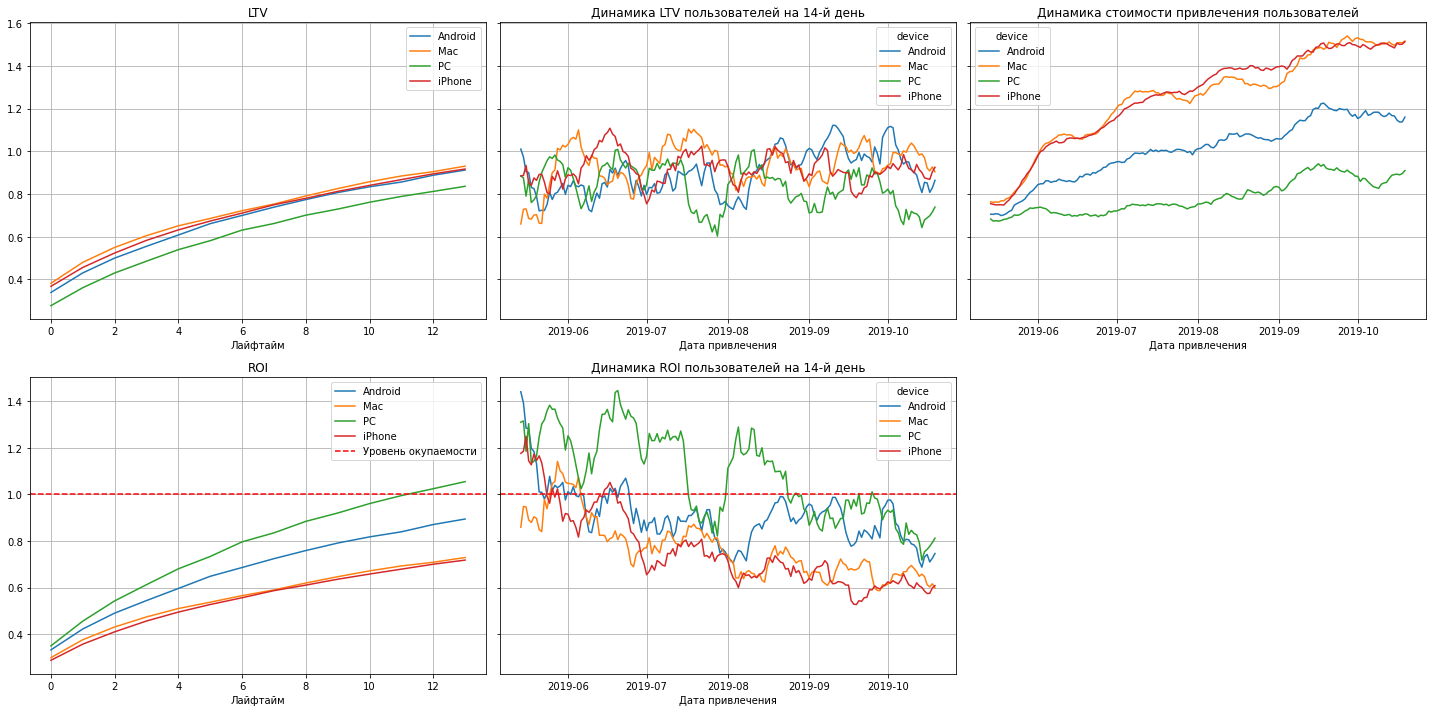

In [55]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div style="border:solid black 1px; padding: 10px"><i>И снова примерно та же ситуация - окупаются только пользователи на PC. Расходы на рекламу растут везде, но при этом для платформ iPhone и Mac они самые крупные, а отдача - самая низкая. То есть, с точки зрения бизнеса прибыль приносит только версия на PC. Возможно, имеют место быть какие-то баги и/или недостаточная оптимизация версий для платформ Apple, потому как с рекламным бюджетом там проблем нет, а вот окупаемость, мягко говоря, оставляет желать лучшего. Эти платформы - зона роста</i></div>

#### Анализ окупаемости рекламы по странам

<i>Теперь проделаем то же самое по странам</i>

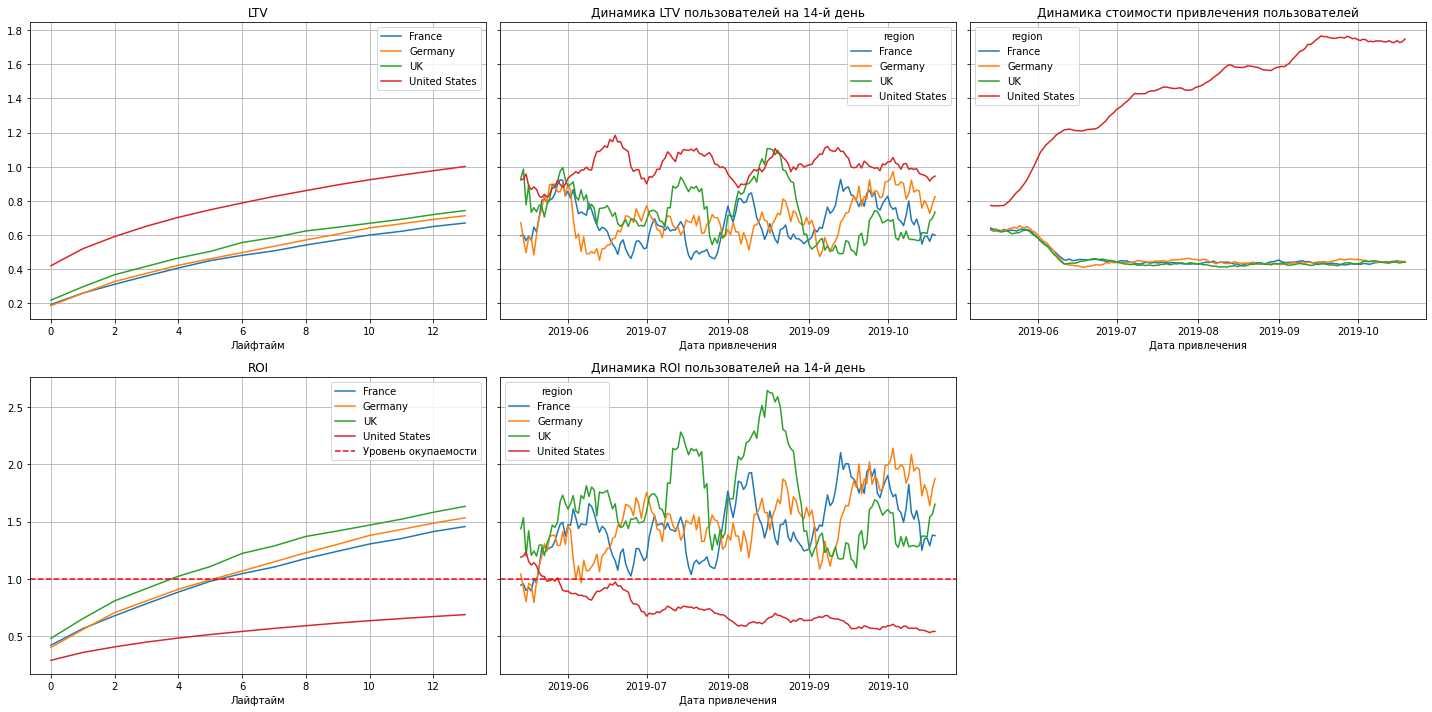

In [56]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div style="border:solid black 1px; padding: 10px"><i>Вот здесь очень хорошо видно проблемное место - пользователи из США, которые, между прочим, составляют подавляющее большинство пользователей приложения. Стоимость привлечения пользователей оттуда сильно возросла с июня (и понизилась для всех остальных стран), и в то же время только Штаты не вышли на уровень окупаемости. Очевидно, маркетинговая кампания в США неэффективна - возможно, стоит обратить большее внимание на европейский рынок</i></div>

#### Анализ окупаемости рекламы по каналам привлечения

<i>И, наконец, посмотрим разбивку по каналам привлечения</i>

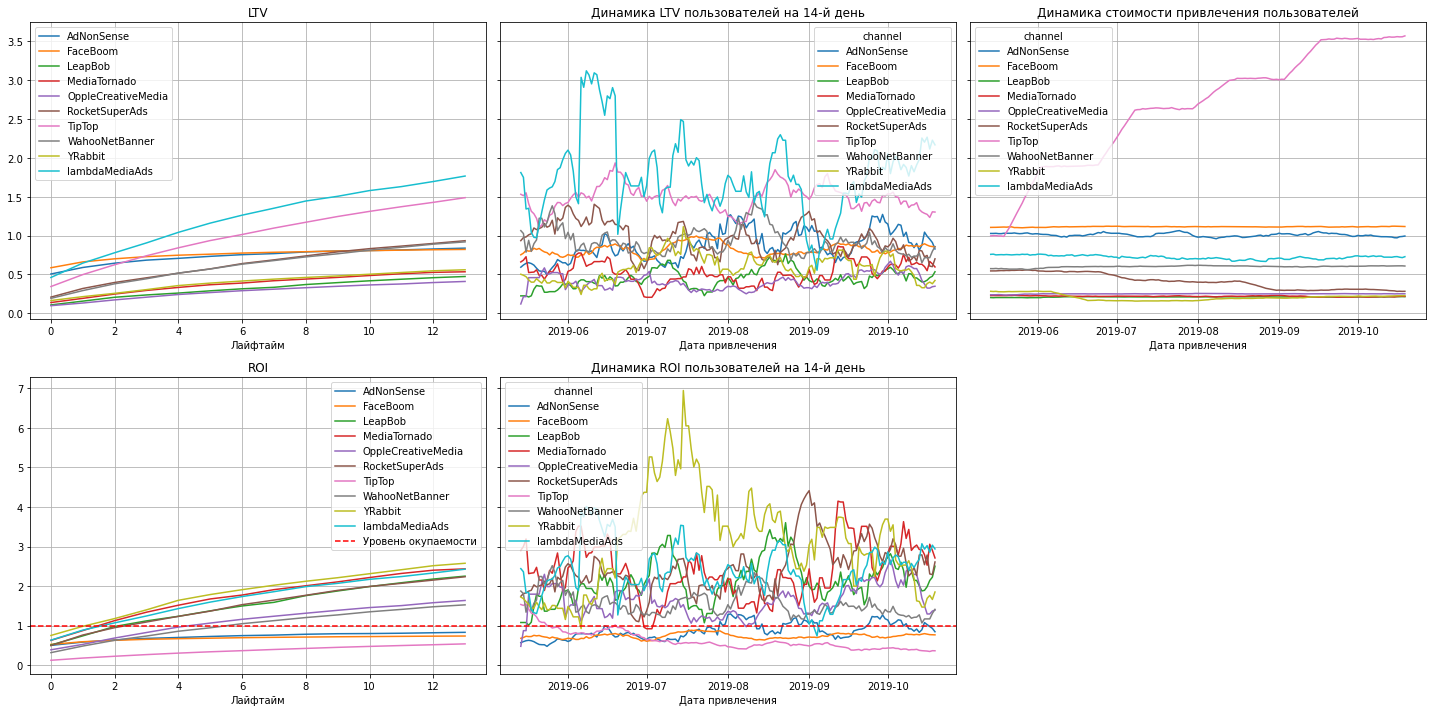

In [57]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div style="border:solid black 1px; padding: 10px"><i>Самые дорогие с точки зрения привлечения суммы привлечения средств каналы оказываются в то же время теми, которые не окупаются. Особенно это касается TipTop, о котором уже неоднократно говорилось ранее: это очень проблемный канал - дорогой и самый неокупаемый, кроме того - этот канал даже не является лидером по количеству привлечённых пользователей. Рекомендуется обратить более пристальное внимание на другие площадки: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds</i></div>

#### Расчет конверсии и коэффициента удержания

<i>Посчитаем и выведем графики конверсии с разбивкой по устройствам</i>

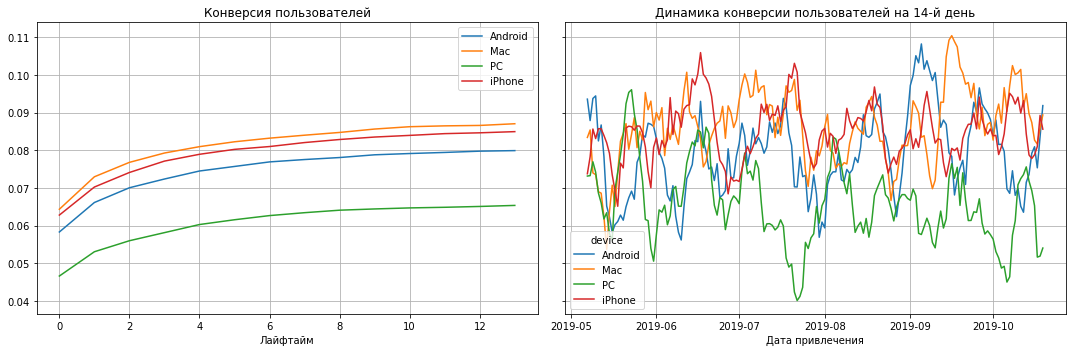

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<i>Удержание пользователей по устройствам</i>

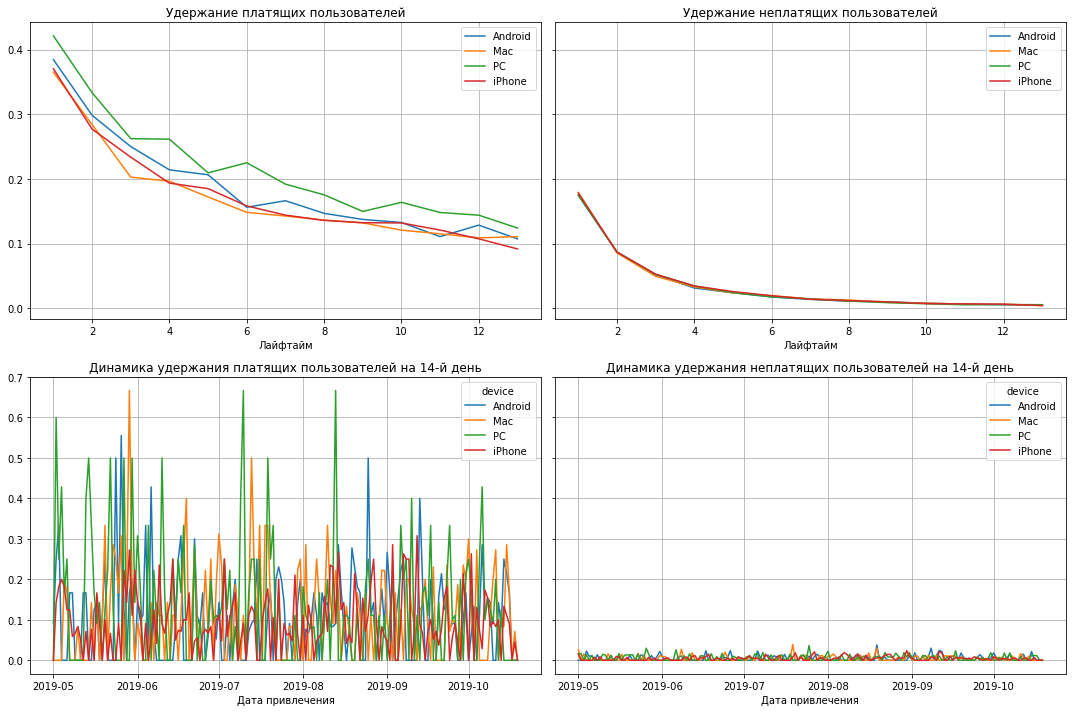

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid black 1px; padding: 10px"><i>Интересная картина - пользователи iPhone и Mac конвертируются в платящих лучше всего (в целом, аудитория экосистемы Apple, как правило, более платежеспособная), однако они же и хуже всего удерживаются. В то же время с пользователями на PC ситуация противоположная - они гораздо хуже конвертируются, но удерживаются лучше. Неплатящие пользователи удерживаются одинаково плохо на всех платформах</i></div>

<b><i>Разбивка по странам</i></b>

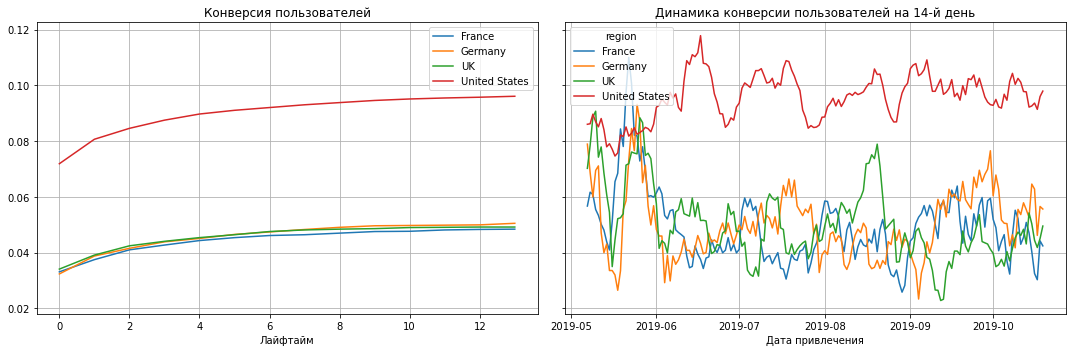

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

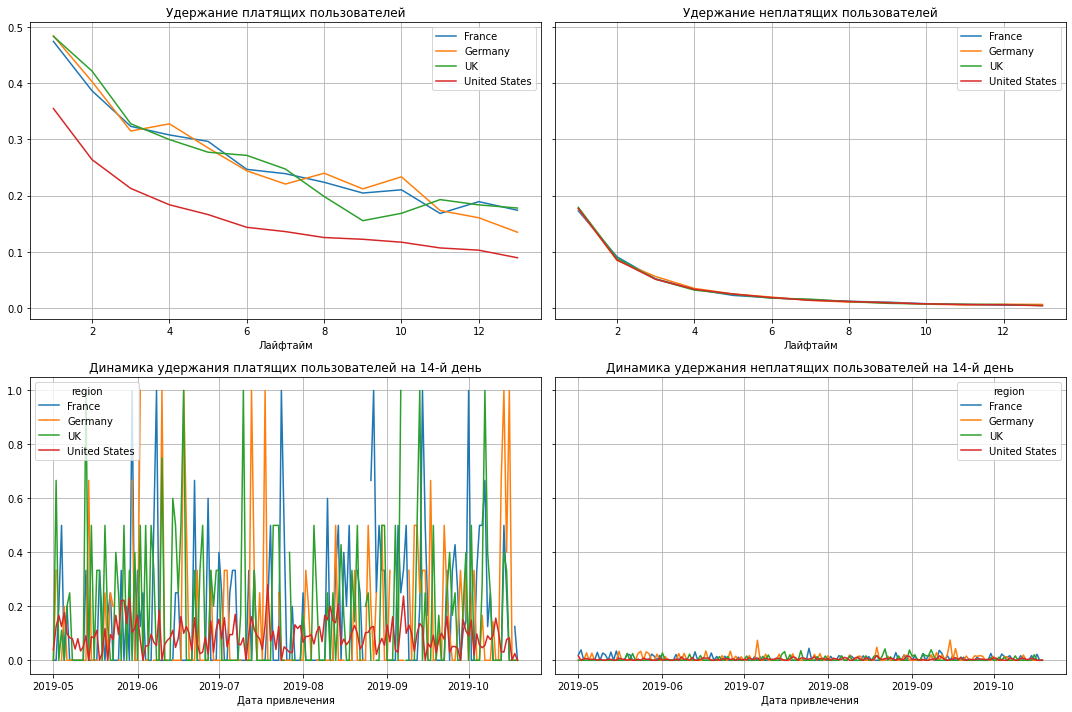

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid black 1px; padding: 10px"><i>И здесь предыдущие выводы подтверждаются - пользователи из США конвертируются в платящих сильно охотнее, но настолько же хуже и удерживаются</i></div>

<b><i>Разбивка по каналам привлечения</i></b>

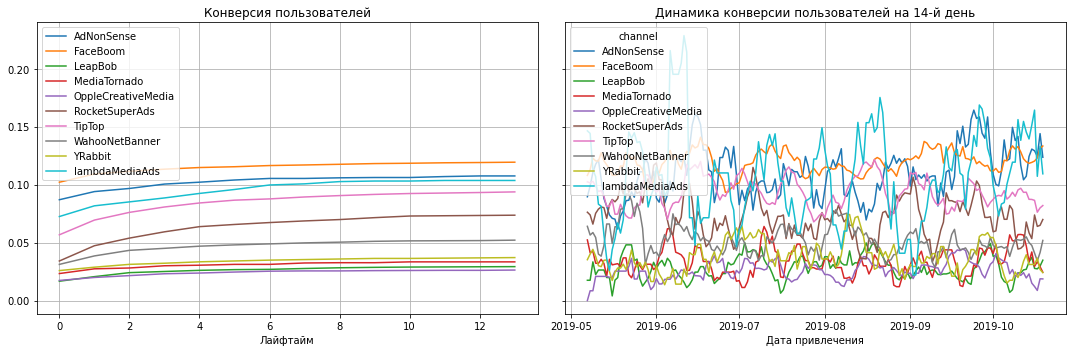

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

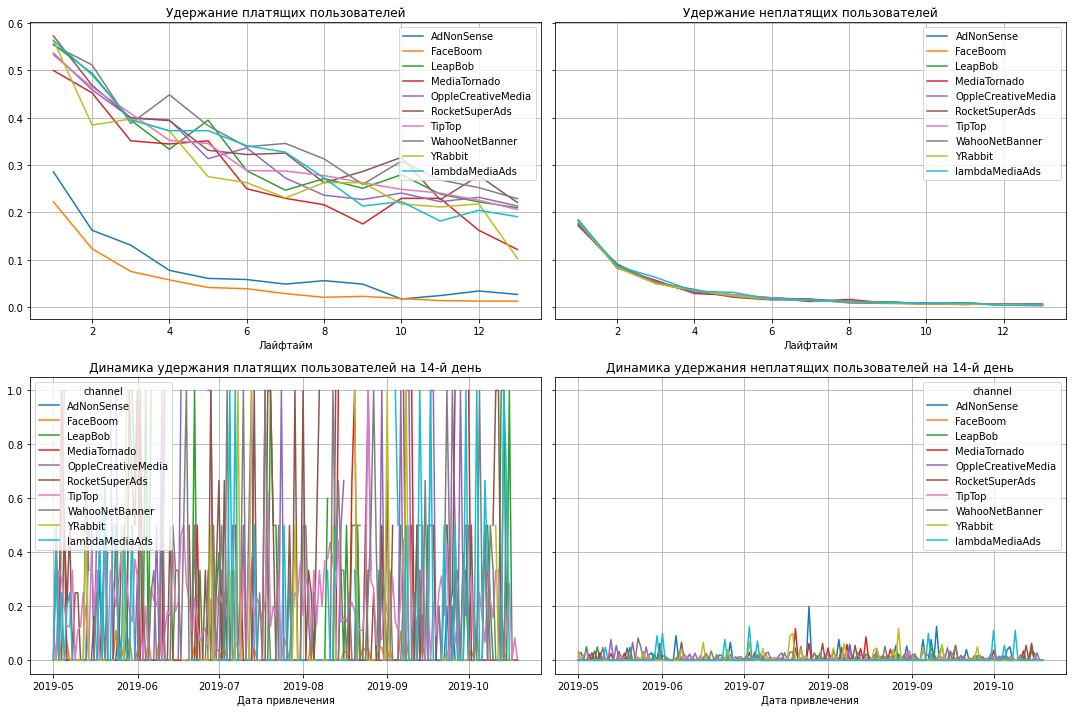

In [63]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid black 1px; padding: 10px"><i>А здесь в дополнение к неэффективной площадке TipTop добавим ещё FaceBoom и AdNonSense. Ранее мы уже выяснили, что эти площадки не являются окупаемыми, но более того - пользователи, пришедшие с них, удерживаются значительно хуже остальных</i></div>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Итак, проблемные точки и зоны роста найдены. Это:
        <ul>
            <li>Ориентация на пользователей экосистемы Apple, которые хоть и конвертируются в платящих лучше остальных, но так же хуже остальных и удерживаются в приложении</li>
            <li>Пользователи из США. Это основная проблема, на их привлечение тратится больше всего средств, но при этом они очень плохо удерживаются</li>
            <li>Площадки TipTop, FaceBoom и AdNonSense, на которые пришёлся почти весь рекламный бюджет, не вышли даже на окупаемость</li>
        </ul>
    </b></i>
</div>

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<div style="border:solid green 4px; padding: 20px">
    <i><b>
        Основные причины неэффективности привлечения - ориентация на те группы пользователей, которые приносят малую прибыль и не выходят даже на уровень окупаемости. Рекомендации для маркетингового и технического отделов:
        <ul>
            <li>Пользователи на iPhone и Mac хорошо конвертируются в платящих, но удерживаются гораздо хуже. Следует проанализировать UX/UI этих версий, а также проверить, нет ли каких-либо технических ошибок при пользовании ими. В качестве референса можно взять версию приолжения для PC</li>
            <li>Обратить более пристальное внимание на европейский рынок. Пользователи оттуда удерживаются значительно лучше. Если же говорить про американский рынок - можно провести анализ по целевым аудиториям. Очевидно, что те группы, которые являются приоритетными сейчас, малоэффективны с точки зрения совершения покупок в приложении</li>
            <li>Перераспределить вложение основной массы средств с площадок TipTop, FaceBoom и AdNonSense на другие, более перспективные - YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds. Первые две не очень хороши в плане конверсии в платящих, однако хорошо проявили себя с точки зрения окупаемости. Последние же две - привлекательны и в конверсии, и в окупаемости</li>
        </ul>
    </b></i>
</div>